# Project: Horse or Human Classification using CNN
we have data for training:

500 horse images 527 human (male & female ) image 

For Validation :

122 horse images 123 human (male & female ) images 
# Problem statement :
Classifie given image is horse or human (male/female)
# Solution :
To Solve this Problem we are going to use Deep Learning Algorithm is CNN (Convolutional Neural Network)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [ ]:
keras.__version__

'2.8.0'

# Load Data

In [ ]:
train_data_path = "https://drive.google.com/drive/folders/uc?export=download&id=1FvArso2mBa0DVZyeRFhnoFi-_Xz6Nmg6"
validation_data_path = "https://drive.google.com/drive/folders/uc?export=download&id=16o3-cFlBlXDFNnrznQCX3JxeGG1jQrVp"

# Data Preprocessing

In [ ]:
training_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range = 40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      horizontal_flip = True,
                                      fill_mode = 'nearest')

In [ ]:
training_data = training_datagen.flow_from_directory(train_data_path,
                                     target_size = (150,150),
                                     batch_size = 32,
                                     class_mode='binary')

Found 1027 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
valid_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
valid_data = training_datagen.flow_from_directory(validation_data_path,
                                     target_size = (150,150),
                                     batch_size = 32,
                                     class_mode='binary')

Found 256 images belonging to 2 classes.


In [ ]:
def plotImage(images_arr):
  fig,axes = plt.subplots(1,5,figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()



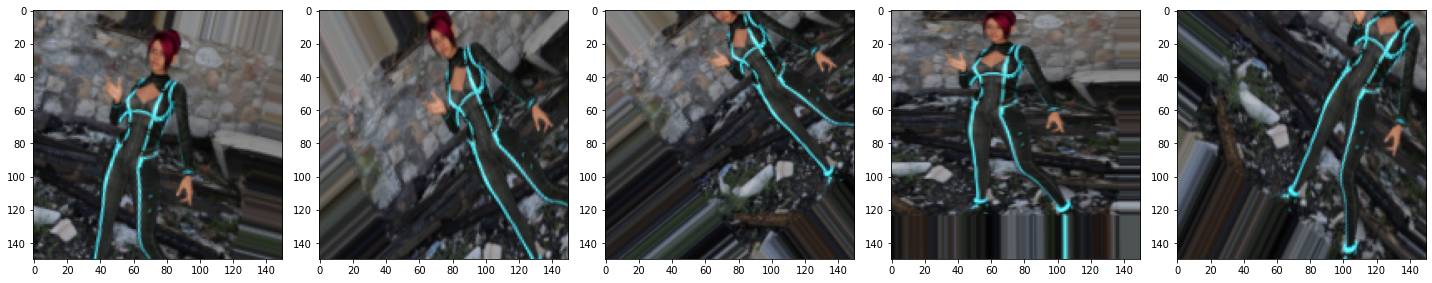

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImage(images)

# Building CNN Model

In [ ]:
from warnings import filters
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32 , kernel_size = 3,input_shape = [150,150,3]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64 , kernel_size = 3),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128 , kernel_size = 3),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256 , kernel_size = 3),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 128,activation = 'relu'), 
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units = 256,activation = 'relu'), 
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units = 256,activation = 'relu'), 
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units = 128,activation = 'relu'), 
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(units = 2,activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras.optimizers import adam_v2
from keras.callbacks import ModelCheckpoint
model.compile(optimizer = 'adam',
              loss = "sparse_categorical_crossentropy",
             metrics = ['accuracy'])
model_path = "horse_or_human_predictor1.h5"
checkpoint = ModelCheckpoint(model_path,monitor = 'val_accuracy',verbose =1, save_best_only = True,mode ='max')
callbacks_list = [checkpoint]

In [ ]:
history =model.fit(training_data,epochs =100,
                   verbose =1,
                   validation_data = valid_data,
                   callbacks = callbacks_list)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 0.7350 - accuracy: 0.5297
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/ML Projects/horse-or-human/horse_or_human_predictor1.h5
33/33 [==============================] - 23s 479ms/step - loss: 0.7350 - accuracy: 0.5297 - val_loss: 0.9747 - val_accuracy: 0.5000
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.6342 - accuracy: 0.6680
Epoch 2: val_accuracy improved from 0.50000 to 0.63281, saving model to /content/drive/MyDrive/ML Projects/horse-or-human/horse_or_human_predictor1.h5
33/33 [==============================] - 15s 447ms/step - loss: 0.6342 - accuracy: 0.6680 - val_loss: 0.6665 - val_accuracy: 0.6328
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.5424 - accuracy: 0.7361
Epoch 3: val_accuracy did not improve from 0.63281
33/33 [==============================] - 15s 462ms/step - loss: 0.5424 - accuracy: 0.7361 - val_loss:

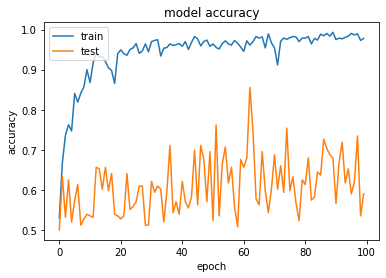

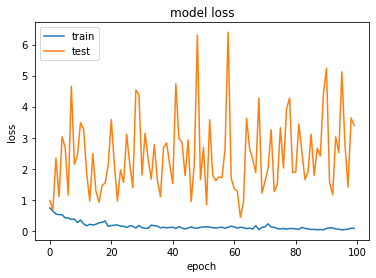

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

# summarize history for loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
from keras.layers import BatchNormalization
from keras.regularizers import l2
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[150, 150, 3],kernel_regularizer=l2(l=0.01)),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=64, kernel_size=5),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                          
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                      
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    BatchNormalization(),
                                    keras.layers.Dropout(0.5),                                      
                                    keras.layers.Dense(units=256, activation='relu'),  
                                    BatchNormalization(),                                  
                                    keras.layers.Dropout(0.5),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [ ]:
# compile cnn model
cnn_model.compile(optimizer = adam_v2.Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
model_path = "horse_or_human_predictor2.h5"
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
 
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 0.8899 - accuracy: 0.6485
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/ML Projects/horse-or-human/horse_or_human_predictor2.h5
33/33 [==============================] - 17s 447ms/step - loss: 0.8899 - accuracy: 0.6485 - val_loss: 0.8585 - val_accuracy: 0.5000
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.7743 - accuracy: 0.7215
Epoch 2: val_accuracy did not improve from 0.50000
33/33 [==============================] - 14s 439ms/step - loss: 0.7743 - accuracy: 0.7215 - val_loss: 1.1088 - val_accuracy: 0.5000
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.7223 - accuracy: 0.7196
Epoch 3: val_accuracy did not improve from 0.50000
33/33 [==============================] - 14s 439ms/step - loss: 0.7223 - accuracy: 0.7196 - val_loss: 1.0428 - val_accuracy: 0.5000
Epoch 4/100
33/33 [==============================] - ETA: 0s - loss: 

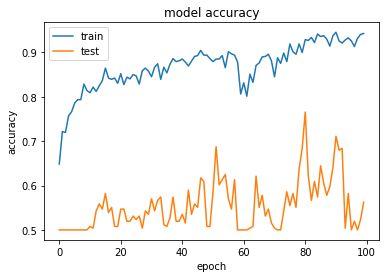

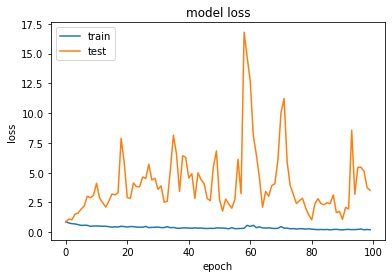

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_path1 = "horse_or_human_predictor1.h5"
model_path2 = "horse_or_human_predictor2.h5"

model1 = keras.models.load_model(model_path1)
model2 = keras.models.load_model(model_path2)

In [ ]:
h1 = "test images/hrf1.jfif"
h2 = "test images/hrf2.jfif"
h3 = "test images/hrf3.jfif"

hu1 = "test images/hu1.jpg"
hu2 = "test images/hu2.jpg"
hu3 = "test images/hu3.jpg"

In [ ]:
from keras.preprocessing import image 
def pred_human_horse(model,horse_or_human):
  test_image = image.load_img(horse_or_human,target_size = (150,150))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image,axis =0)

  result = model.predict(test_image).round(3)

  pred = np.argmax(result)
  print(result,'--->>>',pred)

  if pred == 0:
    print('Predicted >>> Horse')
  else:
    print("Predicted >>> Human")

In [ ]:
for horse_or_human in [h1,h2,h3,hu1,hu2,hu3]:
  pred_human_horse(model1,horse_or_human)

[[1. 0.]] --->>> 0
Predicted >>> Horse
[[0.122 0.878]] --->>> 1
Predicted >>> Human
[[0.988 0.012]] --->>> 0
Predicted >>> Horse
[[0.939 0.061]] --->>> 0
Predicted >>> Horse
[[0. 1.]] --->>> 1
Predicted >>> Human
[[0.939 0.061]] --->>> 0
Predicted >>> Horse


In [ ]:
for horse_or_human in [h1,h2,h3,hu1,hu2,hu3]:
  pred_human_horse(model2,horse_or_human)

[[0.999 0.001]] --->>> 0
Predicted >>> Horse
[[0. 1.]] --->>> 1
Predicted >>> Human
[[0.003 0.997]] --->>> 1
Predicted >>> Human
[[0.084 0.916]] --->>> 1
Predicted >>> Human
[[0.004 0.996]] --->>> 1
Predicted >>> Human
[[0.448 0.552]] --->>> 1
Predicted >>> Human
